In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

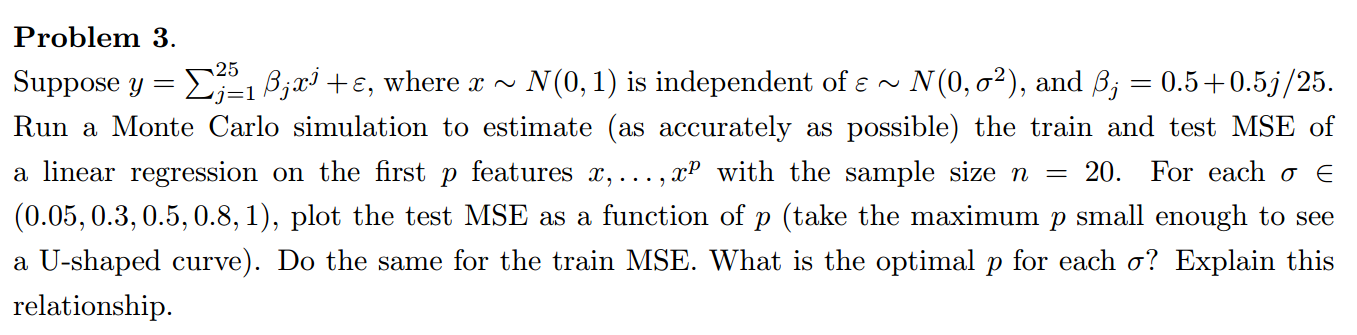

In [3]:
from IPython.display import Image
Image(filename = 'Problem 3.PNG')

In [ ]:
# Monte Carlo Simulation to estimate Train & Test MSE on a linear regression
from sklearn.linear_model import LinearRegression

# Parameters setup
n = 20
d = 25
d_range = range(1, 7, 1)
sigma_range = [0.05, 0.3, 0.5, 0.8, 1]
sigma_x = 1
n_test = 100
n_sims = 500
np.random.seed(5)
beta = np.linspace(0.5, 1, d)

def generate_data_polynomial(n, d, sigma, sigma_x, beta):
x_base = sigma_x * np.random.rand(n)
X = [x_base ** i for i in range(1, d + 1)]
X = np.column_stack(X)
eps = sigma * np.random.randn(n)
Y = X @ beta + eps
return X, Y

model = LinearRegression()
mse_test, mse_train = dict(), dict()
# mse test & train append
for d_fit in d_range:
    for sigma in sigma_range:
        mse_test[(d_fit, sigma)] = np.empty(n_sims)
        mse_train[(d_fit, sigma)] = np.empty(n_sims)

for s in range(n_sims):
    for sigma in sigma_range:
    X_train, Y_train = generate_data_polynomial(n, d, sigma, sigma_x, beta)
    for d_fit in d_range:
    model.fit(X_train[:, :d_fit], Y_train)
    X_test, Y_test = generate_data_polynomial(n_test, d, sigma, sigma_x, beta)
    Y_pred = model.predict(X_test[:, :d_fit])
    mse_test[(d_fit, sigma)][s] = mean_squared_error(Y_test, Y_pred)
    Y_pred = model.predict(X_train[:, :d_fit])
    mse_train[(d_fit, sigma)][s] = mean_squared_error(Y_train, Y_pred)

fig, (ax_test, ax_train) = plt.subplots(1, 2)
for sigma in sigma_range:
    for d_fit in d_range:
        mse_test[(d_fit, sigma)] = np.mean(mse_test[(d_fit, sigma)])
        mse_train[(d_fit, sigma)] = np.mean(mse_train[(d_fit, sigma)])
    ax_test.plot(d_range, [mse_test[(d_fit, sigma)] for d_fit in d_range], linestyle='--', marker='o',
    label = 'sigma = ' + str(sigma))
    ax_train.plot(d_range, [mse_train[(d_fit, sigma)] for d_fit in d_range], linestyle='--', marker='o',
    label = 'sigma = ' + str(sigma))
ax_test.title.set_text('Test MSE')
ax_train.title.set_text('Train MSE')
plt.legend()
plt.show()

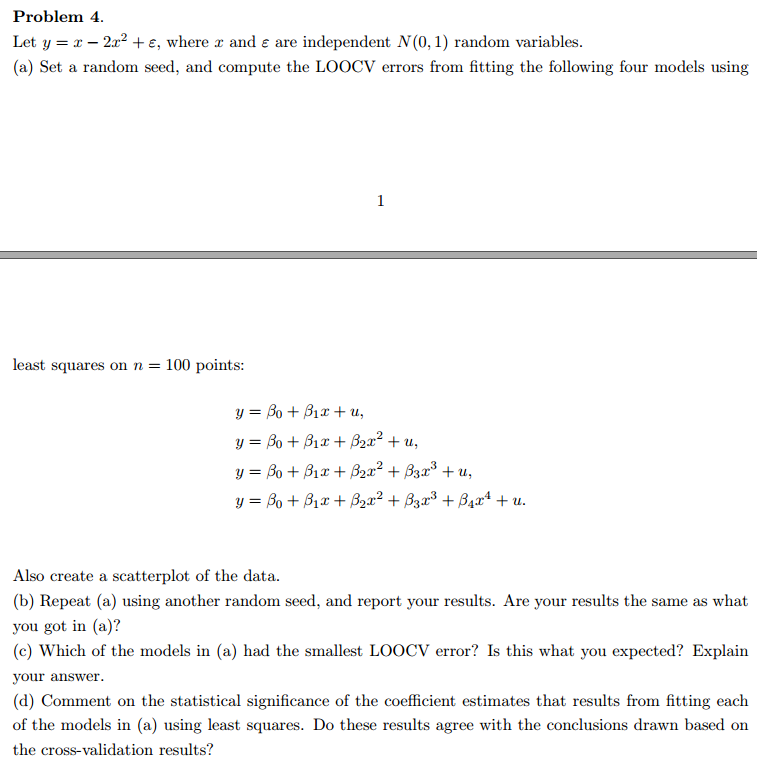

In [10]:
Image(filename = 'Problem 4.PNG')

In [ ]:
from sklearn.model_selection import cross_validate
from scipy import stats
from sklearn.linear_model import LinearRegression

n = 100
model = LinearRegression()

for seed in [1,2]:
    np.random.default_rng(seed)
    print(">>>>>> Random Seed: " + str(seed))
    x = np.random.normal(size = n)
    y = x - 2 * x**2 + np.random.normal(size = n)
    plt.scatter(x, y)
    plt.show()
    for p in range(1,5):
        xp = np.transpose([x**i for i in range(0,p+1)])
        # Compute LOOCV MSE:
        cv = cross_validate(model,xp,y,cv = n,scoring = 'neg_mean_squared_error', return_train_score = True)
        
        # Calculate standard errors:
        model.fit(xp,y)
        mse = mean_squared_error(y, model.predict(xp))
        se = np.sqrt(np.diag(np.linalg.inv(np.dot(xp.T, xp))) * mse)
        
        # Calculate p-values:
        t_stats = model.coef_ / se
        p_values = [2 * (1 - stats.t.cdf(np.abs(t), n-p)) for t in t_stats]
        print('p =', p, ', test MSE (CV) =', -np.mean(cv['test_score']))
        print('p-values = ' + str([f"{p_val:.2f}" for p_val in p_values])

(b) The results are different across seeds because of randomness in the data,␣
and therefore LOOCV-estimated MSE.

(c) The lowest cross-validated MSE is achieved for p=2, which is expected␣
given that the true model has p=2.

(d) Calculating the p-values (see codes), we see that only the coefficients␣
on x and x^2 (whenever included in the specification) are significant at 1%. This agrees with the fact that the true model only includes x and x^2␣
(without an intercept).

-----------------------------------

Problem 3 This problem uses the Weekly.csv dataset (uploaded on Bruinlearn) containing 1089
weekly stock returns for 21 years. 
(a) Use the full dataset to fit a logistic regression of today’s
stock movement (up or down) on the five lags of returns and the trading volume. 

(b) Calculate the confusion matrix, accuracy, precision, recall, and F1 score for the in-sample predictions. Does
the model uniformly beat random guessing in terms of these performance metrics? 

(c) On the same graph, plot precision and recall against the threshold (varying over [0, 1]) used to generate predicted labels from predicted probabilities. Explain the pattern you see. 

(d) Now fit the logistic regression using only data up to (and including) the year 2008, with Lag2 as the only predictor.

(e) Use the remaining observations as a test sample to repeat (b) and (c). 

(f) Which of the two fitted models would you use for real-time stock return prediction?

In [8]:
# 1089 Weekly Stock Returns Over 21 Years
df = pd.read_csv("Weekly.csv", index_col = 'Year')
df

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...
2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up


In [ ]:
# Logit Model: HW 2 Stock Movement Prediction
from statsmodels.discrete.discrete_model import Logit
data = pd.read_csv(datapath, header=0)
data['Direction_num'] = data['Direction'] == 'Up' # up or down
data.describe()

# logit regression with full data:
X_train = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Y_train = data['Direction_num']
model = Logit(Y_train, X_train).fit()
print(model.summary())

Y_pred_raw = model.predict(X_train)
Y_pred_label = Y_pred_raw >= 0.5
confusion_matrix(Y_train, Y_pred_label)
print('Precision = ', precision_score(Y_train, Y_pred_label))
print('Recall = ', recall_score(Y_train, Y_pred_label))
print('F1-score = ', f1_score(Y_train, Y_pred_label))
print('Accuracy = ', accuracy_score(Y_train, Y_pred_label))
prec, rec, thresholds = precision_recall_curve(Y_train, Y_pred_raw)

plt.plot(np.append(thresholds,1), prec, label='Precision')
plt.plot(np.append(thresholds,1), rec, label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# logit regression with 1990-2008 data and Lag2 only:
data_08 = data[(data['Year'] >= 1990) & (data['Year'] <= 2008)]
Y_train_08 = data_08['Direction_num']
X_train_08 = data_08['Lag2']
model = Logit(Y_train_08, X_train_08).fit()
print(model.summary())

data_test = data[(data['Year'] > 2008)]
X_test = data_test['Lag2']
Y_test = data_test['Direction_num']

Y_test_pred_raw = model.predict(X_test)
Y_test_pred_label = Y_test_pred_raw >= 0.5
confusion_matrix(Y_test, Y_test_pred_label)
print('Precision = ', precision_score(Y_test, Y_test_pred_label))
print('Recall = ', recall_score(Y_test, Y_test_pred_label))
print('F1-score = ', f1_score(Y_test, Y_test_pred_label))
print('Accuracy = ', accuracy_score(Y_test, Y_test_pred_label))

-----------------------------------

In [ ]:
# Model Fitting on Simple OLS, Lasso, Ridge: HW 3
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

Y = data['Apps']
X = data.drop('Apps', axis=1)
X['Private'] = X['Private'] == 'Yes
Y_train = Y[:600]
X_train = X[:600]
Y_test = Y[600:]
X_test = X[600:]

# For the rest of the problem, let the penalization parameter 𝜆 vary on the 1000-point grid from 0.01 to 60.
alphas = np.linspace(0.01,60,1000)

# OLS:
reg = LinearRegression().fit(X_train, Y_train)
print('OLS: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))

# LASSO:
reg = LassoCV(cv = 20, random_state = 0, alphas = alphas).fit(X_train, Y_train)
print('LASSO: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))
plt.plot(reg.alphas_, np.mean(reg.mse_path_, axis = 1))
plt.title('LASSO: Test MSE vs penalization parameter')
plt.show()

# RIDGE:
reg = RidgeCV(cv = None, alphas = alphas, store_cv_values = True).fit(X_train,␣
↪Y_train)
print('RIDGE: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))
plt.plot(reg.alphas, np.mean(reg.cv_values_, axis = 0))
plt.title('RIDGE: Test MSE vs penalization parameter')
plt.show()

For the rest of the problem, let the penalization parameter vary on the 1000-point grid from 0.01 to 60.

(iii) Fit the LASSO regression on the training set, with the penalization parameter chosen by 20-fold cross-validation. Report the test error obtained.

In [16]:
# LASSO Optimal Lambda Selection
alphas = np.linspace(0.01, 60, 1000)  
modCV = LassoCV(alphas = alphas, cv = 20).fit(X, y)
optimal_alpha = modCV.alpha_
print("LASSO Optimal Alpha", optimal_alpha)

# LASSO Estimation with Optimal Lambda
LAS_reg = Lasso(alpha = optimal_alpha)  
LAS_reg.fit(X, y)

# Prediction and Model Evaluation
y_pred_LAS = LAS_reg.predict(X_test)
mse_LAS = mean_squared_error(y_test, y_pred_LAS)

print("LASSO Mean Squared Error:", mse_LAS)

LASSO Optimal Alpha 3.9733033033033034
LASSO Mean Squared Error: 1502356.45553993


(iv) Fit the ridge regression on the training set, with the penalization parameter chosen by leave-one-out cross-validation. Report the test error obtained.

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import RidgeCV

# Ridge Model Setup with Cross-validated Alpha Selection: LOOCV
ridge_cv = RidgeCV(alphas = np.linspace(0.01, 60, 1000), store_cv_values = True)

# Fit the model on the training data
ridge_cv.fit(X, y)
print(f'Ridge Optimal Alpha: {ridge_cv.alpha_}')

# Ridge Prediction
y_pred_ridge = ridge_cv.predict(X_test)

# Ridge Mean Squared Error Calculation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')

Ridge Optimal Alpha: 25.231021021021025
Ridge Mean Squared Error: 1504969.168073851


-----------------------------------

In [ ]:
# Decision Tree: HW 4 Survival on the Titanic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import zero_one_loss

#  Fit a decision tree of maximal depth 𝑑 ∈ {1, 2, 3, 4, 5, 6, 7, 8} with the information gain as thesplitting criterion
d_range = [1,2,3,4,5,6,7,8]
misclass_rates = np.empty((len(d_range),))
for i in range(len(d_range)):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d_range[i], random_state = 0)
    clf.fit(X_train, y_train)
    # plot the decision tree
    if d_range[i] in [1,2]:
    plt.figure()
    plot_tree(clf, feature_names = X.columns, class_names = ['not surv','surv'], filled=True)
    plt.show()
    # calculate test error:
    y_pred = clf.predict(X_test)
    misclass_rates[i] = zero_one_loss(y_test, y_pred)
# plot misclassification rates:
plt.figure()
plt.plot(d_range, misclass_rates)
plt.xlabel('depth')
plt.ylabel('misclassification rate')
plt.show()

-----------------------------------

In [ ]:
# SMOTE-NC: HW 5 Fraudulent Card Transaction  
from imblearn.over_sampling import SMOTENC

d_range = [0.1,0.3,0.5,0.7,0.9,1]
train_F1 = np.empty((len(d_range),))
test_F1 = np.empty((len(d_range),))
train_recall = np.empty((len(d_range),))
test_recall = np.empty((len(d_range),))
train_precision = np.empty((len(d_range),))
test_precision = np.empty((len(d_range),))

for i in range(len(min_to_maj_range)):
    # quick-win categorical features conversion
    sm = SMOTENC(categorical_features = ['repeat_retailer', 'used_chip',␣
    ↪'used_pin_number', 'online_order'], random_state = 0, k_neighbors = 5, sampling_strategy = d_range[i])
    x_res, y_res = sm.fit_resample(x_train, y_train)
    
    print('min_to_max =', d_range[i])
    print('resampled data: n_obs =', y_res.shape[0], 'share of fraud =', np.mean(y_res))
    
    # DECISION TREE
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    clf.fit(x_res, y_res)
    train_F1[i] = f1_score(y_res, clf.predict(x_res))
    print('Train F1 =', train_F1[i])
    test_F1[i] = f1_score(y_test, clf.predict(x_test))
    print('Test F1 =', test_F1[i])
    train_precision[i] = precision_score(y_res, clf.predict(x_res))
    train_precision[i] = precision_score(y_test, clf.predict(x_test))
    train_recall[i] = recall_score(y_res, clf.predict(x_res))
    train_recall[i] = recall_score(y_test, clf.predict(x_test))

plt.figure()
plt.plot(min_to_maj_range, train_F1)
plt.plot(min_to_maj_range, test_F1)
plt.title('F1 score')
plt.legend(['train F1', 'test F1'])
plt.show()

-----------------------------------

In [ ]:
# Neural Networks: HW 6
import numpy as np
from scipy.optimize import minimize
sigmoid = lambda x: 1 / (1 + np.exp(-x))
np.random.seed(3)
x = np.random.normal(0, 1, size=(1000000,1))

y = sigmoid(x)

# 1-layer NN
emp_loss_1 = lambda w: np.mean((y - w[1]*sigmoid(w[0]*x))**2)

# 2-layer NN
emp_loss_2 = lambda w: np.mean((y - w[2]*sigmoid(w[1]*sigmoid(w[0]*x)))**2)
w_ini = [0, 0]
results_1 = minimize(emp_loss_1, w_ini)
print('========= 1-LAYER NN =========')
print(results_1)

w_ini = [0, 0, 0]
results_2 = minimize(emp_loss_2, w_ini)
print('========= 2-LAYER NN =========')
print(results_2)

Answer: Adding another hidden layer yields higher training error given applying dissimilar activation functions apart from the output to respective
layers. As such, training errors skyrocket, indicating that the model performs better by getting rid of overfitting the training samples and is able to
achieve the more complex outcomes from newly-added neurons infrastructure (validity of the rationale also depends on lower testing errors than
prior).

-----------------------------------

In [ ]:
# Random Forest: HW8 Marketing Campaign on A Term Deposit Subscription Prediction
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv()
# Categorical variable conversion w/o dropping any
categorical_vars = ["job","marital","education","contact","day","month","housing","default","loan","poutcome"]
data_encoded = pd.get_dummies(data, columns=categorical_vars)

X = data_encoded.drop(columns='y')
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

# A random forest with a random subset of m = p**1/2 features
max_feat_list = [int(np.sqrt(X.shape[1])), X.shape[1]]
n_trees_list = [1, 2, 3, 4, 5, 10, 20, 50]

for max_features in max_feat_list:
    print('=== m =', max_features, '===')
    accuracy, precision, recall, f1 = [], [], [], []
    for n_trees in n_trees_list:
        print('Number of trees =', n_trees)
        rf = RandomForestClassifier(max_features = max_features, n_estimators = n_trees, random_state = 1).fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, pos_label='yes'))
        recall.append(recall_score(y_test, y_pred, pos_label='yes'))
        f1.append(f1_score(y_test, y_pred, pos_label='yes'))
        
        # Features Importance: 81 features in total with 9 features after taking square root
        feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index = list(X.columns))
        print(feature_imp.sort_values(by = 'importance', ascending = False))
        
    plt.figure()
    plt.plot(n_trees_list, accuracy)
    plt.plot(n_trees_list, precision)
    plt.plot(n_trees_list, recall)
    plt.plot(n_trees_list, f1)
    plt.xlabel('Number of trees')
    plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
    plt.title('Max features = ' + str(max_features))
    plt.show()

-----------------------------------

In [ ]:
# K-Means Clustering: HW9
X = pd.DataFrame([[1,4], [1,3], [0,4], [5,1], [6,2], [4,0]], columns=['x1','x2'])
n, k = X.shape
# (a)
plt.figure()
plt.scatter(X['x1'], X['x2'])
plt.title('Original data')
plt.show()
# (b)
cluster_labels = [0, 1]
np.random.seed(0)
clusters = np.random.choice(cluster_labels, size=n, replace=True)
print('Initial cluster assignment:', clusters)
# (c), (d), (e)
clusters_prev = np.empty((2,))
i = 0
while not np.array_equal(clusters_prev, clusters):
    i += 1
    print('=== Iteration', i, '===')
    centroids = pd.DataFrame([X[clusters==0].mean(axis=0), X[clusters==1].mean(axis=0)])
    print('Centroids:', centroids)
    dist0 = np.linalg.norm(X - centroids.loc[0], axis=1)
    dist1 = np.linalg.norm(X - centroids.loc[1], axis=1)
    clusters_prev = clusters
    clusters = np.array(1*(dist1 <= dist0))
    print('Clusters:', clusters)
# (f)
plt.figure()
plt.scatter(X['x1'], X['x2'], c=clusters)
plt.title('Clustering outcome')
plt.show()

In [ ]:
# Eigenfaces: HW 9
from sklearn.datasets import fetch_olivetti_faces
df = fetch_olivetti_faces()
images = df.images
df = df.data

mean_df = np.mean(df, axis = 0)
demeaned_df = df - mean_df 
demeaned_df

from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
pca.fit(demeaned_df)
eigenfaces = pca.components_
eigenfaces = eigenfaces.reshape((9, 64, 64)) # 64x64 pixels
fig, axes = plt.subplots(3, 3, figsize = (8, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i], cmap = 'gray')
    ax.axis('off')
plt.show()

In [ ]:
# Progressing Faces: HW 9
progressing_idx = list(range(1, n_faces, n_faces // (N_SUBPLOTS-1)))
progressing_idx.append(n_faces)

face_idx = np.random.randint(n_faces)
progressing_faces = np.zeros((N_SUBPLOTS, n_pixels))
for i, n_eigenfaces in enumerate(progressing_idx):
    progressing_faces[i,:] = eigenweights[face_idx, 
                                          :n_eigenfaces].reshape(1,n_eigenfaces) \ dot(eigenfaces[:n_eigenfaces, :])
plt.gcf().clear()
plot_gallery("Progressing Faces", progressing_faces)
plt.show()

-----------------------------------

In [ ]:
# Feedforward Neural Network: Two ReLU Layers using SGD
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchinfo import summary

# SET PARAMETERS HERE ---------
batch_size = 500
epochs = 10
learning_rate = 0.01
n_train = 500000

data = pd.read_csv(datapath, header=0)
x_all = data.drop('fraud', axis=1)
y_all = data['fraud']
x_train, y_train = x_all[:n_train], y_all[:n_train]
x_test, y_test = x_all[n_train:], y_all[n_train:]

class NNModel(nn.Module):
    def __init__(self , input_size):
    super(NNModel , self).__init__()
    self.flatten = nn.Flatten()
    self.sequential = nn.Sequential(
    nn.Linear(input_size , 10),
    nn.ReLU(),
    # nn.Dropout (0.4),
    nn.Linear(10, 1),
    nn.Sigmoid())
    def forward(self , x):
    x = self.flatten(x)
    return torch.flatten(self.sequential(x))
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and␣
    ↪dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 100 == 0:
        loss, current = loss.item(), batch * batch_size + len(X)
        # print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and␣
    ↪dropout layers
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct, true_negs, true_poss, false_negs, false_poss = 0, 0, 0,␣
    ↪0, 0, 0
    # Evaluating the model with torch.no_grad() ensures that no gradients are␣
    ↪computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage␣
    ↪for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += ((pred>0.5) == y).type(torch.float).sum().item()
        false_negs = torch.logical_and(pred<=0.5, y==1).sum().item()
        false_poss = torch.logical_and(pred>0.5, y==0).sum().item()
        true_poss = torch.logical_and(pred>0.5, y==1).sum().item()
    test_loss /= num_batches
    correct /= size
    precision = true_poss / (true_poss + false_poss)
    recall = true_poss / (true_poss + false_negs)
    print(f"Accuracy: {(100*correct):>0.1f}%")
    print(f"Precision: {(100*precision):>0.1f}%")
    print(f"Recall: {(100*recall):>0.1f}%")

model = NNModel(x_train.shape[1])
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
summary(model, input_size=x_train.shape, col_names=['input_size','output_size', 'num_params'])

data_train = TensorDataset(torch.tensor(x_train.values.astype(np.float32)),torch.tensor(y_train.values.astype(np.float32)))
train_dataloader = DataLoader(data_train, batch_size=batch_size)

data_test = TensorDataset(torch.tensor(x_test.values.astype(np.float32)), torch.tensor(y_test.values.astype(np.float32)))
test_dataloader = DataLoader(data_test, batch_size=batch_size)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)